In [1]:
# import relevant libraries here
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import acf

Use your understanding of how seasonality trend and noise interact in a time series to generate data set similar to the one above.
The information that you need to reproduce this dataset is provided below:

* The data contains 200 months worth of data

* The trend is an exponential function: 

$$y = (1.5^{(\frac{\sqrt(x)}{2})}) $$

* The seasonality in this dataset is quarterly (frequency of 4 months)
and is a sine curve with an amplitude of 1.2

* The noise is Gaussian with a mean of $\mu=0$ and $\sigma=1$  

1. Compute and plot each of the components of your time series independently.

* Plot your data to verify your solution. Your plots should look like the following:

<img src="images/three_plots.png" alt="drawing" style="width:300px;"/>

2. Generate the time series by combining the three components. 

Important: use the following seed so that graph matches the one above exactly. 

```
np.random.seed(42)
```

In [2]:
# simulating the trend
np.random.seed(42)

x_axis = np.arange(0, 200)
trend = np.zeros(len(x_axis))

for i, _ in enumerate(x_axis):
    trend[i] = exp = 29 + 1.01** x_axis[i]

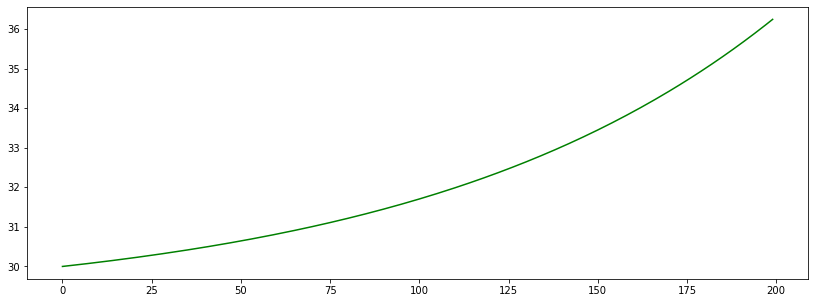

In [3]:
# plot trend
plt.figure(figsize=(14,5))
plt.plot(x_axis, trend,  c='green')

In [4]:
x_axis = np.linspace(0, 12, 200)
f_1 = np.zeros(len(x_axis))

for i, _ in enumerate(x_axis):
    f_1[i] = 1.2 * np.sin(2 * np.pi * x_axis[i] / 4)

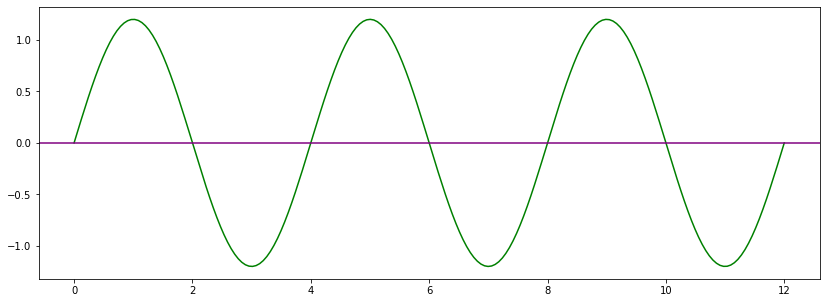

In [5]:
# plot seasonality
plt.figure(figsize=(14,5))
plt.plot(x_axis, f_1,  c='green')
plt.axhline(y=0, color = 'purple')

In [18]:
x_axis = np.arange(0, 200)
noise = np.zeros(len(x_axis))

for i, _ in enumerate(x_axis):
    noise[i] = np.random.normal(0, 1)

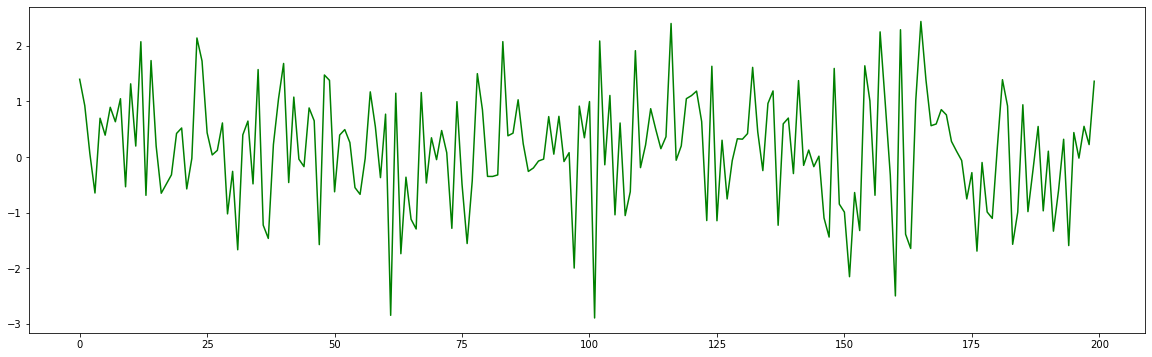

In [19]:
# plot random noise
plt.figure(figsize=(20,6))
plt.plot(x_axis, noise,  c='green')

* Compute and plot your combined signal. The resulting graph should look (approximately) like the following.
<img src="images/final_timeseries.png" alt="drawing" width="600px"/>



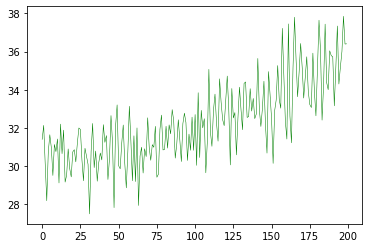

In [21]:
seasonality = np.zeros(len(x_axis))
for i, _ in enumerate(x_axis):
    seasonality[i] = 1.2 * np.sin(2 * np.pi * x_axis[i] / 4)

plt.plot(x_axis, trend + seasonality + noise, linewidth=0.5,  c='green')


4. Compute the autocorrelation for the 20 first lags and observe that lags  4, 8, 12, 15 represent the 1st, 2nd, 3rd, and 4th highest lags, respectively. 
Your graph should be similar to the graph below.

<img src="images/acf_simulated.png" alt="drawing" style="width:500px;"/>

<StemContainer object of 3 artists>

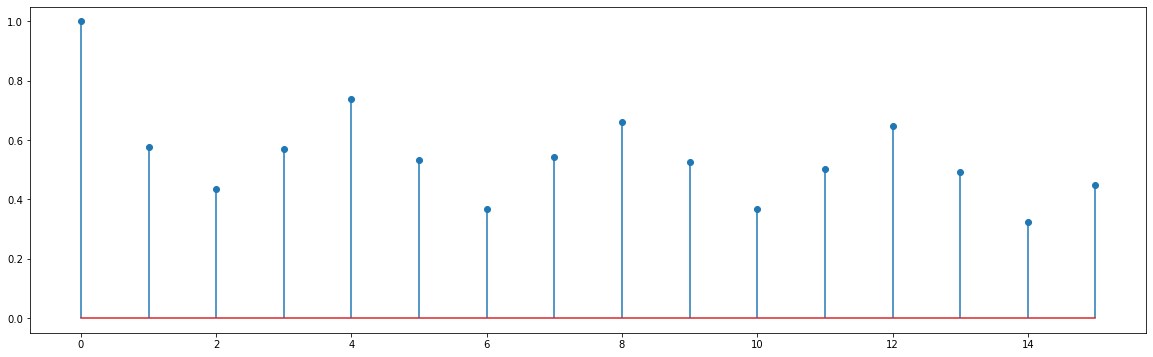

In [24]:
acf_v_s_t = acf(trend + seasonality + noise, nlags=20)

plt.figure(figsize=(20,6))
plt.stem(range(len(acf_v_s_t[:16])), acf_v_s_t[:16])

What does the graph above tell you about the trend in the data?  How would you explain it to a colleague who is not familiar with the ACF plots nor how they can be used to assess whether there is a trend in the data?

In [25]:
print("In this graph, we can see that there is a trend and seasonality. When a time series have a trend, the autocorrelation of smaller lags  are larger than bigger lags. Thus, the ACF will have decreasing values as the lags increase, and the wavy shape is due the seasonality.")

In this graph, we can see that there is a trend and seasonality. When a time series have a trend, the autocorrelation of smaller lags  are larger than bigger lags. Thus, the ACF will have decreasing values as the lags increase, and the wavy shape is due the seasonality.


* While the example above focused on a single sine wave with an amplitude of  1.2 and a frequency of 4 months. Real-time series often have other embedded signals. for instance, in addition to a quarterly seasonality, the data may contain a less robust monthly sign 


* A weaker monthly signal means that:
    1. The signal has a weaker (smaller amplitude). Let's assume the amplitude here is 0.3
    2. The signal's frequency is one month

* Plot the second harmonic based on the information above. Include the first harmonic signal as a reference. Your plot should look like the following.

<img src="images/harmonic_example.png" alt="drawing" style="width:800px;"/>

* Do not forget to label the lines

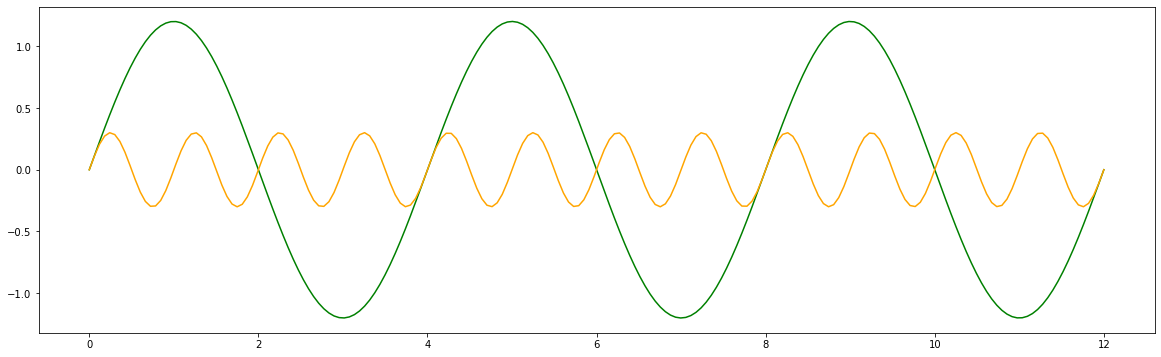

In [26]:
x_axis = np.linspace(0, 12, 200)
f_2 = np.zeros(len(x_axis))

for i, _ in enumerate(x_axis):
    f_2[i] = 0.3 * np.sin(2 * np.pi * x_axis[i])

plt.figure(figsize=(20,6))
plt.plot(x_axis, f_1, c='green')
plt.plot(x_axis, f_2, c='orange')

Plot the full seasonality, which includes the first and the second harmonics. Your plot should look like the following.

<img src="images/combined_sines.png" alt="drawing" style="width:900px;"/>

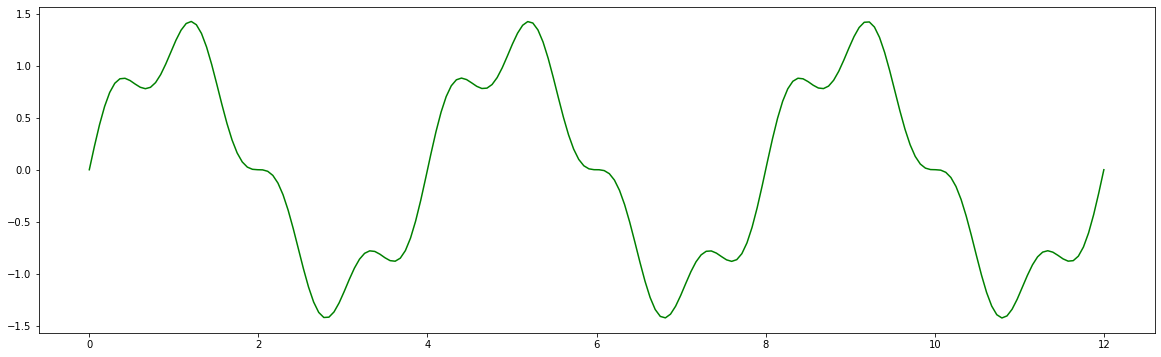

In [30]:
x_axis = np.linspace(0, 12, 200)
full_seasonality = np.zeros(len(x_axis))

for i, _ in enumerate(x_axis):
    full_seasonality[i] = (1.2 * np.sin(2 * np.pi * x_axis[i] / 4)) + (0.3 * np.sin(2 * np.pi * x_axis[i]))

plt.figure(figsize=(20,6))
plt.plot(x_axis, full_seasonality, color='green')

2. Generate the new time series, which includes the trend, both signal, and the stochastic noise. Your final results should look like the following

<img src="images/signal_with_monthly.png" alt="drawing" style="width:800px;"/>




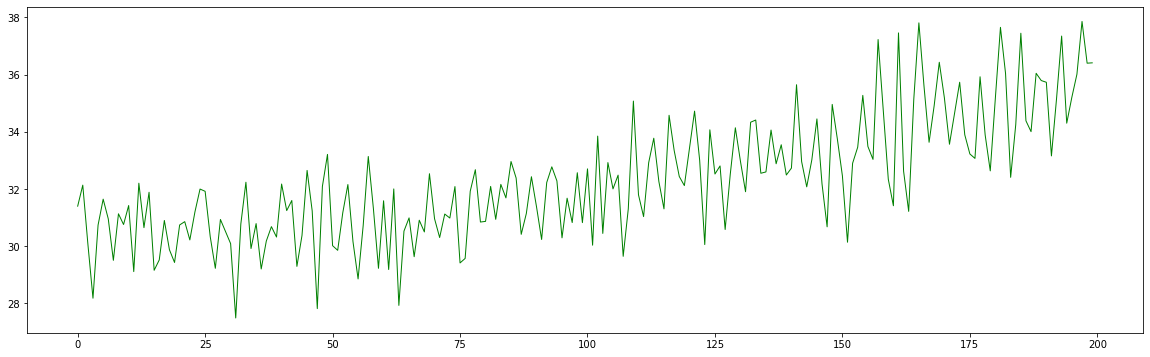

In [31]:
x_axis = np.arange(0, 200)
both_signal = np.zeros(len(x_axis))

for i, _ in enumerate(x_axis):
    both_signal[i] = (1.2 * np.sin(2 * np.pi * x_axis[i] / 4)) + (0.3 * np.sin(2 * np.pi * x_axis[i]))

plt.figure(figsize=(20,6))
plt.plot(x_axis, trend + both_signal + noise, linewidth=1, color='green')

### Question 2: time Series Modeling of Passenger Count for Internationals Departing from LAX

Initially, the approach used here will be very similar to that used above. We will show that not all that looks seasonal can be easily fitted using a line but can be forecasted using triple exponential smoothing instead. 


We will be using a dataset reporting the Los Angeles International Airport Passenger Traffic By Terminal. The data is in the file `data/LAX_final.csv`  and is formatted as a CSV (comma-separated values). The dataset contains multiple fields, but we are only interested in modeling the international departures for LAX between 2009 and 2017. 

Load the data as a pandas DataFrame and used `head()` to make sure the data was read correctly. 

Name you `DataFrame`  as `lax`


In [32]:
lax = pd.read_csv("data/LAX_final.csv")
lax.head()

,ReportPeriod,Terminal,Arrival_Departure,Domestic_International,Passenger_Count
0,01/01/2006 12:00:00 AM,Imperial Terminal,Arrival,Domestic,490
1,01/01/2006 12:00:00 AM,Imperial Terminal,Departure,Domestic,498
2,01/01/2006 12:00:00 AM,Misc. Terminal,Arrival,Domestic,753
3,01/01/2006 12:00:00 AM,Misc. Terminal,Departure,Domestic,688
4,01/01/2006 12:00:00 AM,Terminal 1,Arrival,Domestic,401535


We are only interested in values associated with international departures. Write an expression to retain only lines where "Arrival_Departure" is equal to "Departure" and "Domestic_International" is equivalent to "International."
 
We are also only interested in the columns `ReportPeriod` (i.e., the period covered) and the `Passenger_Count`, the number of passengers reported during that period. 
Create a new  `DataFrame`  (`Lax_int_dep`) which contains only these two columns and only international departures. 






In [33]:
lax_int_dep = lax[(lax["Arrival_Departure"] == 'Departure') & (lax["Domestic_International"] == 'International')]
lax_int_dep = lax_int_dep.drop(columns=['Terminal', 'Arrival_Departure', 'Domestic_International'])

Compute the total number of passengers (`Passenger_Count`) per month. 
Call your new DataFrame `lax_totals`. Use the shape attribute to make sure that your resulting DataFrame matches the expected results --  recall that the data have reported values for January 2006 through January 2019.


In [34]:
lax_int_dep['ReportPeriod'] = pd.to_datetime(lax_int_dep['ReportPeriod'])
lax_totals = lax_int_dep.groupby(lax_int_dep['ReportPeriod'].dt.strftime('%Y-%m-%d'))['Passenger_Count'].sum()
lax_totals = lax_totals.reset_index()

Recall that changing the index of the time series dataset simplifies the analysis.  Change the type of your index DataTime Index. Set the frequency of your observations to month start (`MS`).

In [35]:
dateIndex = pd.to_datetime(pd.date_range('1/1/2006', periods = len(lax_totals), freq= "MS"))
lax_totals.index = dateIndex

The reporting reported includes the financial crisis of 2007-2009 https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008. 

According to news reports, travel in 2009 was ["ravaged"](https://skift.com/2018/09/14/10-years-later-how-the-travel-industry-came-back-from-the-financial-crisis/)

Plot the data and see for yourself that the number right before 2009 are significantly lower than during the 2006-2008 period. Your plot should look like the following.


<img src="images/lax_complete.png" alt="drawing" style="width:800px;"/>


Hint: If your data does not look like the following, then check that your DataFrame `index`  **makes sense**


Text(0.5, 1.0, 'Passenger Count per Month (2016-2019)')

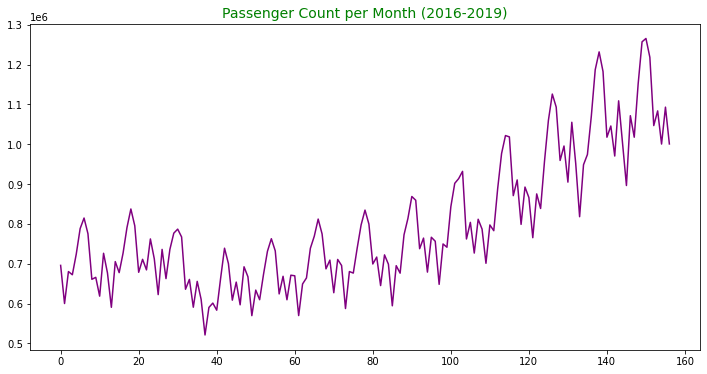

In [36]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,157,1), lax_totals['Passenger_Count'], c='purple')
plt.title(label="Passenger Count per Month (2016-2019)", fontsize=14, color="green")

It would be reasonable to remove data before the 2009 financial crisis so that the model is not affected by this `rare` anomaly. Build a new `DataFrame` and call it `lax_totals_post_08`. Use `shape` to make sure the data contains the expected number of entries. It should contain 12 entries for each of the years 2009 through 2018. Plus January 2019.

In [37]:
lax_totals_post_08 = lax_totals.loc['2009-01-01':'2019-01-31']
lax_totals_post_08.shape

(121, 2)

Plot the data to make sure the data does not contain the dip associated with 2008.

Your graph should look like the following:


<img src="images/lax_totals_post_08.png" alt="drawing" style="width:800px;"/>


Text(0.5, 1.0, 'Passenger Count per Month (2009-2019)')

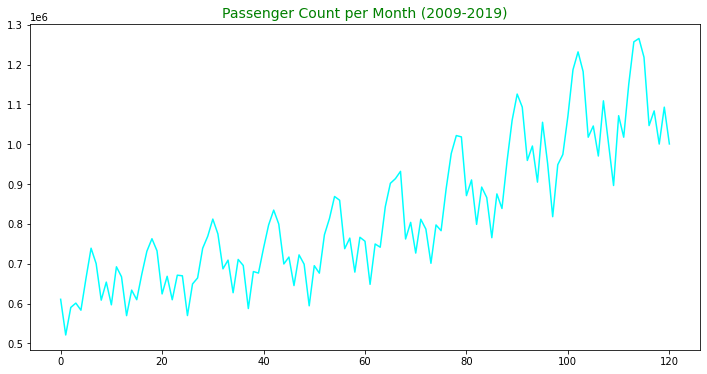

In [38]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,121,1), lax_totals_post_08['Passenger_Count'], c='cyan')
plt.title(label="Passenger Count per Month (2009-2019)", fontsize=14, color="green")

* The dataset exhibits clear trends and seasonality. We will tackle the modeling of the trend prior to "attempting" to model the seasonality.

* Find the best fitting trend line and use it to detrend the data. You can achieve this by using the same strategy as that covered in class. Specifically,  you need to approximate the data using a power function $y = a x^b$, where are $a$ and $b$ are the constants you need to find.
  * use the `curve_fit` from the scipy.optimize module  to find the curve that best matches `lax_totals_post_08`
  

* Plot your best fitting trend as well as your data. Your graph should look like the following.


<img src="images/trend.png" alt="drawing" style="width:900px;"/>


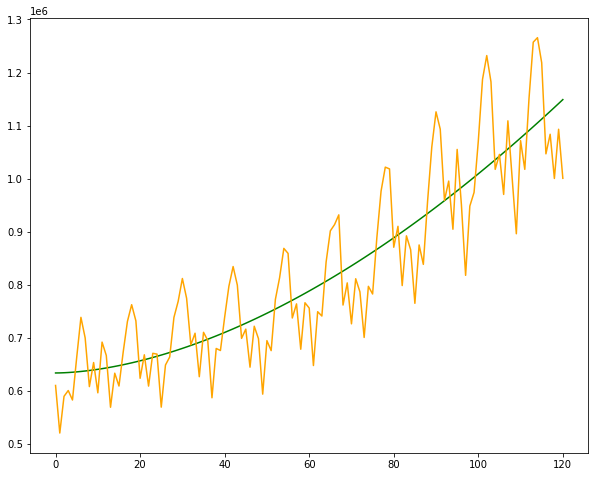

In [44]:
x = np.arange(0, 121, 1)
y =  lax_totals_post_08['Passenger_Count']

def power_fit(x,a,b, c):
    return c + a * x ** b

popt, pcov = curve_fit(power_fit, x, y, maxfev=2000)

plt.figure(figsize=(10, 8))
plt.plot(x, power_fit(x, *popt), '-', c='green')
plt.plot(x, lax_totals_post_08['Passenger_Count'], c='orange')

* In what follows we are going to "try" to identify the seasonality in the data. The approach we will use is similar to that followed in class and above.

* Detrend your data; i.e., Remove the trend so that seasonality is easier to observe. call the detrended data lax_totals_post_08_detrd

* Plot your data to make sure the data is detrended. Your graph should look like the following
  * Plot a horizontal line at y=0 to highlight the seasonality
    
    
<img src="images/detrended.png" alt="drawing" style="width:800px;"/>



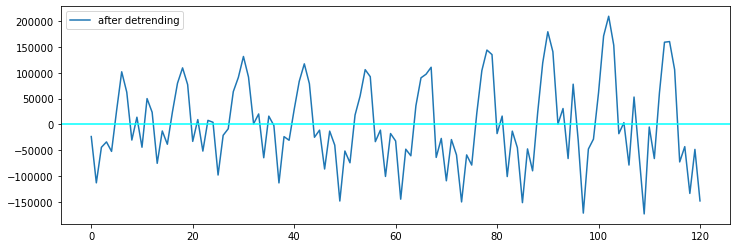

In [47]:
plt.figure(figsize=(12, 4))
lax_totals_post_08_orig_detrd = lax_totals_post_08['Passenger_Count']- power_fit(x, *popt)
plt.plot(x, lax_totals_post_08_orig_detrd, label="after detrending")
plt.axhline(y=0, color = 'cyan')
plt.legend()

* Use the ACF plot to find the highest correation non-zero lag

The highest non-zero lag is 12 with value of 0.823.


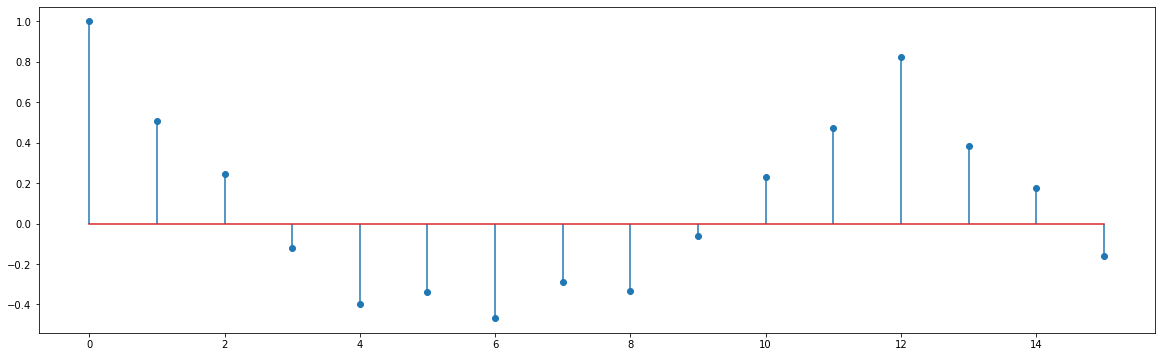

In [48]:
acf_detrd = acf(lax_totals_post_08_orig_detrd, nlags=20)

plt.figure(figsize=(20,6))
plt.stem(range(len(acf_detrd[:16])), acf_detrd[:16])
print("The highest non-zero lag is %d with value of %0.3f." % (acf_detrd[1:].argmax()+1, max(acf_detrd[1:])))

* Rather manually and iteratively finding all the harmonics in the signal, we will use the code below, which fits a signal using a user defined `n_harm` number of harmonincs. For instance, the fitted signal using 1, 3, 5, 10 harmonics is giving below.

<img src="images/harmonics.png" alt="drawing" style="width:1000px;"/>

* I computed the graph above using code I obtained from the following gist:
https://gist.github.com/tartakynov/83f3cd8f44208a1856ce

In [50]:
import numpy as np
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict=0, n_harm=1):
    n = x.size
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

While using a large number of harmonics improves the fits but leads to a very poor forecasting power -- this is referred to as overfitting. We will cover overfitting in more detail in future sessions. 

We suspect that perhaps the data is not stationary. To quickly test this, we can compute the mean and variance of the data for the first half and the second half of the data. 


In [51]:
print(lax_totals_post_08_orig_detrd[0:62].mean())
print(lax_totals_post_08_orig_detrd[62:].mean())

-1930.3899978854217
2028.545434428959


The means are largely different across the first half and the second half. This means that the variability across both subsets don't have the same parameters, indicating that the data is non-stationary, i.e. not exhibiting the same behavior all over. Recall that we said that non-stationary data is difficult to model and forecast using line-fitting. Modeling this date will require fitting two models that cover the different behaviors observed. This makes sense since one model can accommodate the different distributions contained across different time subsets.

Instead of modeling the data using a line, you could use triple exponential smoothing (.i.e., exponential smoothing with trend and seasonality added). This method, which was originally part of this assignment was removed and will be covered in class instead.
